<a href="https://colab.research.google.com/github/santapo/DevC-VietNam-Assignments/blob/master/Team_6_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

# Import Library & Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [70]:
players = pd.read_csv("/content/drive/My Drive/week4/players.csv")
matches = pd.read_csv("/content/drive/My Drive/week4/matches.csv")
winners = pd.read_csv("/content/drive/My Drive/week4/winners.csv")

# Preprocessing

## Players table

In [ ]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [8]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


## Matches

In [25]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [26]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [30]:
matches['MatchID'].value_counts()

300186501.0    2
300186490.0    2
300186508.0    2
300186474.0    2
300186504.0    2
              ..
395.0          1
1990.0         1
265.0          1
300061500.0    1
1096.0         1
Name: MatchID, Length: 836, dtype: int64

In [39]:
matches.dropna(how='all',inplace=True)
matches['Datetime'] = pd.to_datetime(matches['Datetime'])
matches = matches.drop_duplicates(subset='MatchID')
matches.set_index('Year', inplace=True)

In [57]:
matches['Attendance'] = matches['Attendance'].fillna(0)
matches['Attendance'] = matches['Attendance'].astype('int64')

In [58]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 836 entries, 1930.0 to 2014.0
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Datetime              836 non-null    datetime64[ns]
 1   Stage                 836 non-null    object        
 2   Stadium               836 non-null    object        
 3   City                  836 non-null    object        
 4   Home Team Name        836 non-null    object        
 5   Home Team Goals       836 non-null    float64       
 6   Away Team Goals       836 non-null    float64       
 7   Away Team Name        836 non-null    object        
 8   Win conditions        836 non-null    object        
 9   Attendance            836 non-null    int64         
 10  Half-time Home Goals  836 non-null    float64       
 11  Half-time Away Goals  836 non-null    float64       
 12  Referee               836 non-null    object        
 13  Assistant 

In [41]:
matches.tail()

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,
2014.0,2014-07-05 13:00:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL
2014.0,2014-06-29 13:00:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
2014.0,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
2014.0,2014-07-01 13:00:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
2014.0,2014-07-01 17:00:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA


## Winners

In [73]:
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [43]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [74]:
winners['Attendance'] = winners['Attendance'].str.replace('.', '').astype('int64')

In [71]:
matches = matches.replace('Germany FR', 'Germany')
players = players.replace('Germany FR', 'Germany')
winners = winners.replace('Germany FR', 'Germany')

# Data Analysis

## Which countries had won the cup ?

Text(0.5, 1.0, 'Number of podium by country')

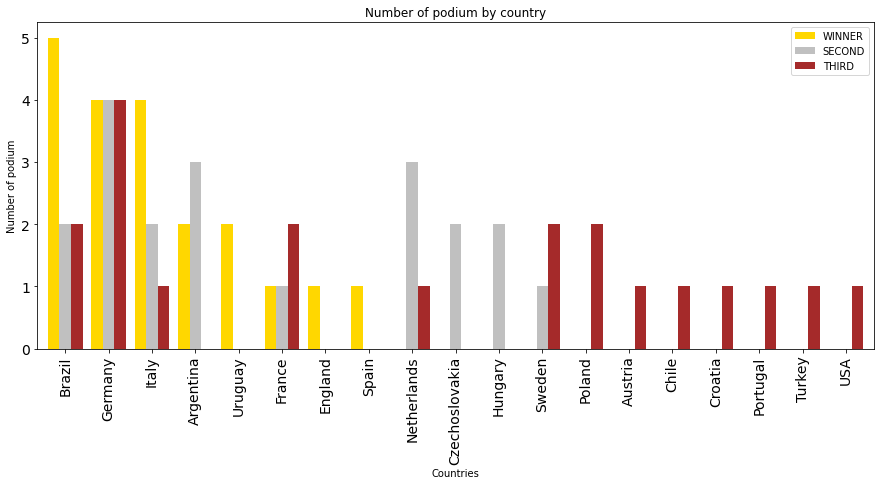

In [60]:
gold = winners["Winner"]
silver = winners["Runners-Up"]
bronze = winners["Third"]
gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())



podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')

podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']


podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

## Attendance, number of teams, goals and matchs per cup

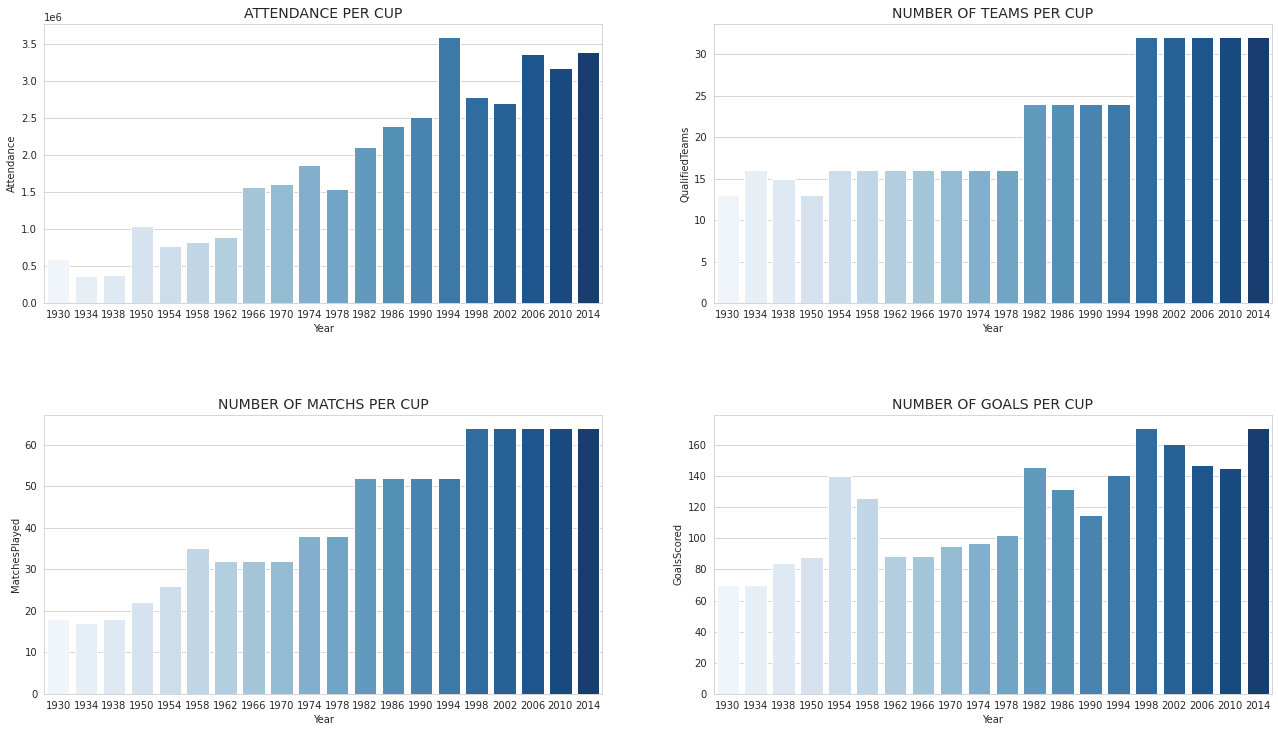

In [76]:
plt.figure(figsize = (22,12))
sns.set_style("whitegrid")
plt.subplot(221)
g1 = sns.barplot(x="Year", y="Attendance", data=winners, palette="Blues")
g1.set_title("ATTENDANCE PER CUP", fontsize=14)

plt.subplot(222)
g2 = sns.barplot(x="Year", y="QualifiedTeams", data=winners, palette="Blues")
g2.set_title("NUMBER OF TEAMS PER CUP", fontsize=14)

plt.subplot(223)
g2 = sns.barplot(x="Year", y="MatchesPlayed", data=winners, palette="Blues")
g2.set_title("NUMBER OF MATCHS PER CUP", fontsize=14)

plt.subplot(224)
g2 = sns.barplot(x="Year", y="GoalsScored", data=winners, palette="Blues")
g2.set_title("NUMBER OF GOALS PER CUP", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

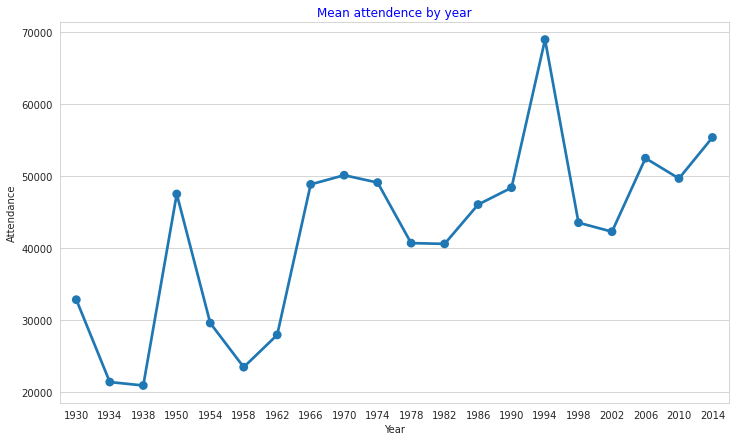

In [81]:
att_mean = matches.groupby("Year")["Attendance"].mean().reset_index()
att_mean["Year"] = att_mean["Year"].astype(int)
plt.figure(figsize=(12,7))
ax = sns.pointplot(x="Year",y="Attendance",data=att_mean)
plt.title("Mean attendence by year",color='b')
plt.show()

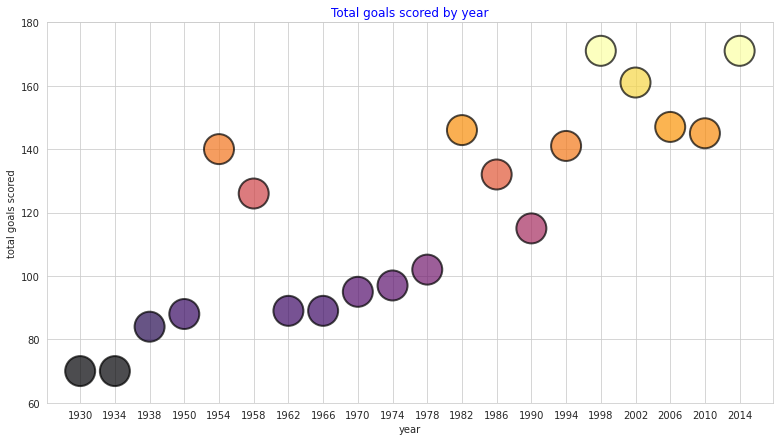

In [86]:
plt.figure(figsize=(13,7))
winners["Year1"] = winners["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=winners,
            c=winners["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

plt.xticks(winners["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

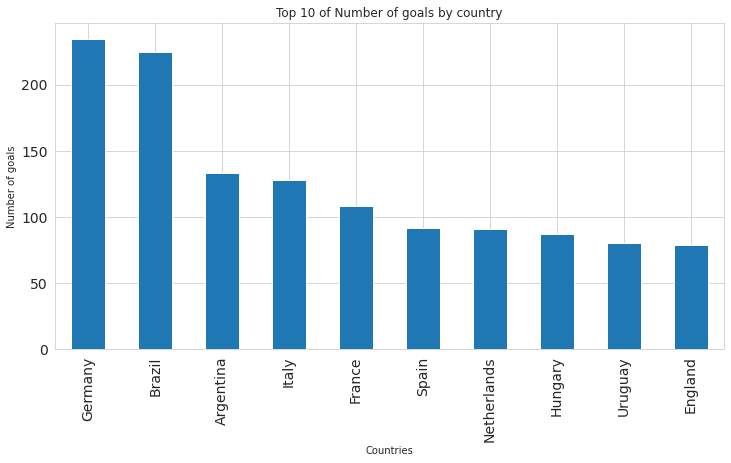

In [75]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')

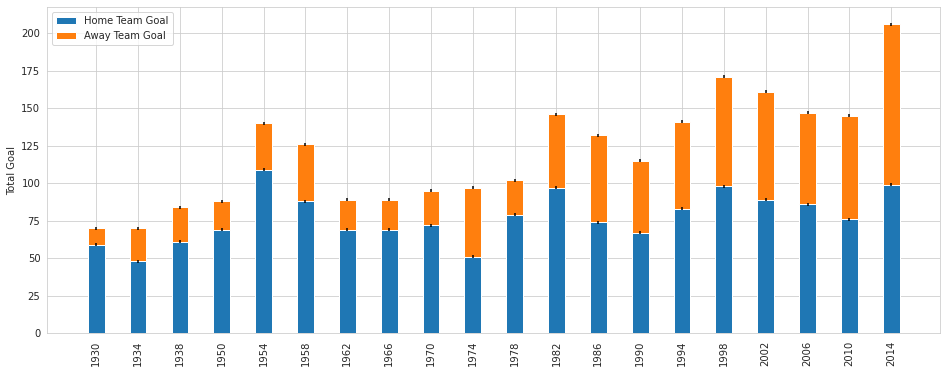

In [92]:
plt.figure(figsize=(16,6))
year=[]
[year.append(i) for i in winners['Year'] if i not in year]
home_team_goal = [np.sum(matches[matches.Year == i]['Home Team Goals']) for i in year]
away_team_goal =[np.sum(matches[matches.Year == i]['Away Team Goals']) for i in year]
total_goal = [home_team_goal[i]+away_team_goal[i] for i in range(len(home_team_goal))]

ind = np.arange(len(year))
p1 = plt.bar(ind, home_team_goal, 0.4 , yerr=np.ones(len(year)))
p2 = plt.bar(ind, away_team_goal, 0.4 , bottom=home_team_goal,yerr=np.ones(len(year)))
plt.ylabel('Total Goal')
plt.xticks(ind, year , rotation=90)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Home Team Goal', 'Away Team Goal'))
plt.show()

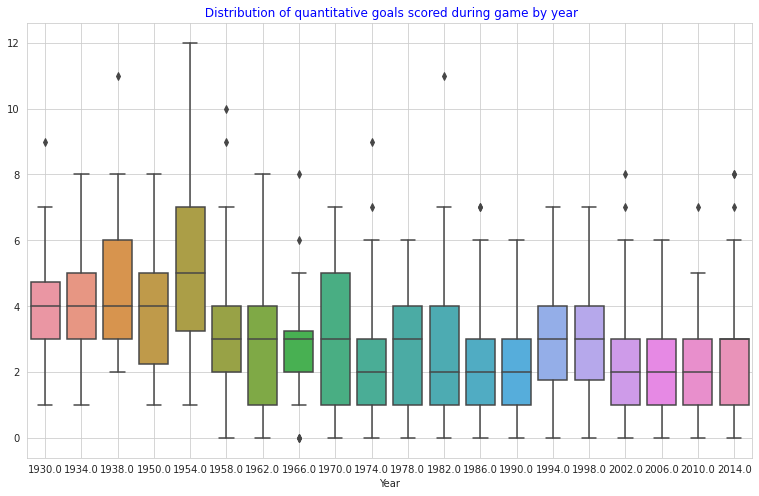

In [103]:
plt.figure(figsize=(13,8))
sns.boxplot(y=matches["Home Team Goals"]+matches["Away Team Goals"],
            x=matches["Year"])
plt.grid(True)
plt.title(" Distribution of quantitative goals scored during game by year",color='b')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misin

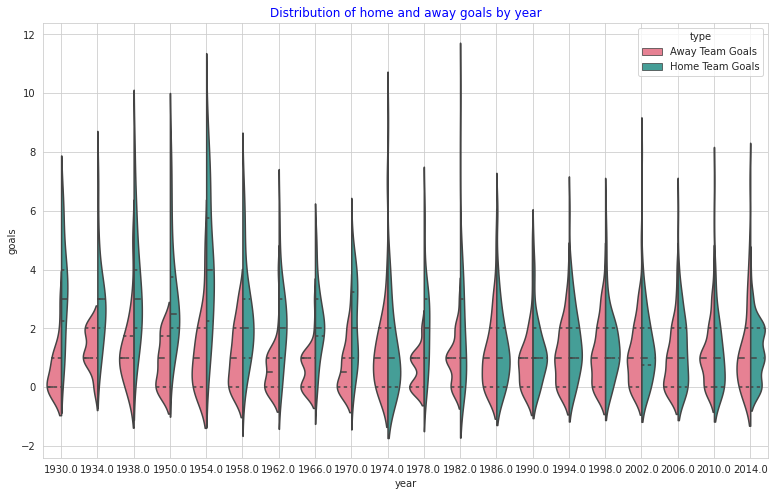

In [107]:
gh = matches[["Year","Home Team Goals"]]
gh.columns = ["year","goals"]
gh["type"] = "Home Team Goals"

ga = matches[["Year","Away Team Goals"]]
ga.columns = ["year","goals"]
ga["type"] = "Away Team Goals"

gls = pd.concat([ga,gh],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(gls["year"],gls["goals"],
               hue=gls["type"],split=True,inner="quart",palette="husl")
plt.grid(True)
plt.title("Distribution of home and away goals by year",color='b')
plt.show()